In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats

from IPython.display import HTML

BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

# Logística de envíos: ¿Cuándo llega?

### Mentoría DiploDatos 2019 

### Práctico: Análisis y visualización de datos

## Motivación

En la actualidad, cada vez más productos se comercializan a través de una plataforma online. Una de las principales ventajas de este sistema es que el usuario puede recibir el producto en su domicilio en una fecha determinada. Pero, ¿cómo sabemos qué día va a llegar? ¿A partir de qué datos podemos predecir la demora del envío? En este práctico se trabajará con datos de envíos de MercadoLibre, el e-commerce más grande de Latinoamérica, analizando y modelando el problema de logística de envíos para poder responder ¿cuándo llega?

## Descripción del dataset

Datos: El conjunto de datos seleccionado para realizar el práctico corresponde a un muestreo aleatorio no uniforme de 500.000 envíos de MercadoLibre. Estos envíos fueron realizados en Brasil en el período comprendido entre Octubre de 2018 y Abril de 2019 (las fechas han sido modificadas y adaptada a un período de tiempo diferente, conservando el día de la semana y considerando los feriados correspondientes). Los datos comprenden variables tanto categóricas como numéricas. 

El dataset presenta la siguiente información:
- Sender_state: Estado de Brasil de donde sale el envío.
- Sender_zipcode: Código postal (de 5 dígitos) de donde sale el envío.
- Receiver_state: Estado de Brasil a donde llega el envío.
- Receiver_zipcode: Código postal (de 5 dígitos) a donde llega el envío.
- Shipment_type: Método de envío (normal, express, super).
- Quantity: Cantidad de productos en un envío.
- Service: Servicio del correo con el cual se realizó un envío.
- Status: Estado del envío (set: listo para ser enviado, sent: enviado, done: entregado, failed: no entregado, cancelled: cancelado).
- Date_created: Fecha de creación del envío.
- Date_sent: Fecha y hora en que se realizó el envío (salió del correo).
- Date_visit: Fecha y hora en que se entregó el envío al destinatario.
- Shipment_days: Días hábiles entre que el envío fue enviado (salió del correo) y que fue entregado.

## Objetivo

El objetivo de este práctico es aprender a leer y analizar el dataset para extraer información útil sobre el problema a resolver. Se espera que se gane conocimiento en el manejo de librerías y metodologías de visualización para generar gráficas de los datos. Otro objetivo es calcular estadísticos que faciliten, junto a los gráficos, dar respuestas a preguntas propias de la problemática. Por último, se busca  desarrollar habilidades de comunicación de la información obtenida a partir de los datos de manera clara y sencilla.

## Método

A partir de lo estudiado en las clases teóricas y prácticas de la materia “Análisis y visualización de datos”, realizar un informe en formato de notebook o interactivo, en el cual se describen los aspectos de mayor relevancia del dataset. En la misma se deben incluir las gráficas y los estadísticos que sean pertinentes para responder a las preguntas indicadas a continuación junto con el análisis y las respuestas propiamente dichas (además de cualquiera otra información extra que se considere de relevancia sobre la problemática): 

1. ¿Qué tipo de variables se encuentran presentes en el dataset? Realizar una breve descripción estadística de las mismas, determinar si existen outliers y valores incorrectos o no esperados.
2. ¿Cómo es la distribución de zipcodes de origen y destino de un envío? ¿Está concentrada en algún valor? ¿Y para el resto de las variables?
3. ¿Es la distribución del número de días que demora un envío normal? ¿Adquiere significado la media y desviación estándar? ¿Qué tipo de estadísticos podrían ser relevantes en este caso? ¿Hay alguna otra distribución a la cual se asemeje más?
4. ¿Cuál es la probabilidad de que el destinatario de un envío sea del estado de Minas Gerais (MG)? ¿Cuál es la probabilidad de que dicho envío (que llega a Minas Gerais) sea realizado mediante el servicio 1? 
5. ¿Cuál es la probabilidad de que un envío sea realizado con el método super express? ¿Y la de que un envío realizado con dicho método llegue al estado de Minas Gerais?
6. ¿Existe correlación entre el número de días que tarda un envío y el destinatario del mismo? ¿Y entre el número de días y la cantidad de productos en un paquete? ¿Con qué otra variable está correlacionado el número de días que tarda un envío? Analizar la independencia de las variables.
7. Además del cálculo de los estadísticos correspondientes, sería interesante observar un gráfico que muestre la información estadística (por ejemplo, la media) y la presencia de outliers del número de días que tardan los envíos que se realizan a los diferentes estados de Brasil. ¿Cuál es el estado que, en promedio, tiene una mayor demora?
8. ¿Cuál es la distancia geográfica de San Pablo a dicho estado? ¿Y al de menor?
9. ¿Cuál es la distribución de la entrega de envíos por hora del día para cada uno de los estados de Brasil? Realizar un único gráfico donde se muestre esta información.
10. Bonus (no obligatorio): Proponer y discutir la aplicación de al menos uno de los contenidos desarrollados en la clase de “Inferencia Bayesiana” al conjunto de datos y problemática aquí presentada. 

Esta comunicación debe estar dirigida para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañeros de clase). Se evaluará, principalmente, la claridad del mensaje presentado, el uso de las herramientas y los conceptos de visualización desarrollados en las clases, y el cálculo de los estadísticos apropiados para el problema. 
Estructura del informe

El informe debe contar con la estructura propia de un reporte de un experimento científico. Esto implica que debe tener un objetivo claro, una introducción a la problemática a resolver en dicho informe (no únicamente al problema general), una descripción de los datos a emplear, el desarrollo propiamente dicho del experimento y las conclusiones que se obtuvieron.

En el informe se deberá brindar una descripción del dataset suministrado (columnas, tipo de variables, valores extremos, etc.), las visualizaciones realizadas que sean pertinentes para la resolución del práctico, un análisis de los gráficos y estadísticos calculados, el análisis y las respuestas a las preguntas indicadas anteriormente, y las conclusiones.

## Entrega

La entrega del informe final será antes del día 17 de Mayo, con una muestra previa de avance el día 10 de Mayo. El notebook donde se realicen los cálculos y gráficos debe encontrarse en un repositorio al cual se pueda acceder. 


---------------------
# Desarrollo

1. ¿Qué tipo de variables se encuentran presentes en el dataset? Realizar una breve descripción estadística de las mismas, determinar si existen outliers y valores incorrectos o no esperados.

In [3]:
dataset = pd.read_csv('dataset_sample_corrected.csv',
                          dtype={'sender_zipcode':'int64',
                                'receiver_zipcode':'int64',
                                'quantity':'int64',
                                'service':'object'},
                         parse_dates=['date_created','date_sent','date_visit'])
dataset.shape

(500000, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 12 columns):
sender_state        500000 non-null object
sender_zipcode      500000 non-null int64
receiver_state      500000 non-null object
receiver_zipcode    500000 non-null int64
shipment_type       500000 non-null object
quantity            500000 non-null int64
service             500000 non-null object
status              500000 non-null object
date_created        500000 non-null datetime64[ns]
date_sent           499971 non-null datetime64[ns]
date_visit          499398 non-null datetime64[ns]
shipment_days       499398 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(3), object(5)
memory usage: 45.8+ MB


In [5]:
np.random.seed(0)
dataset.sample(5)

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,shipment_days
194257,SP,3734,RS,96540,standard,1,4,done,2019-02-17,2019-02-22 03:49:21,2019-03-07 15:09:00,6.0
396319,SP,6422,SP,9580,express,1,5,done,2019-03-04,2019-03-07 20:24:02,2019-03-07 10:02:09,0.0
138738,SP,14940,CE,62650,standard,1,1,done,2019-02-08,2019-02-13 13:51:00,2019-03-11 14:16:00,15.0
66570,SP,1004,MG,32340,express,1,4,done,2019-03-16,2019-03-19 00:52:07,2019-03-25 19:00:00,4.0
149424,SP,13254,BA,44700,express,1,0,done,2019-03-02,2019-03-04 15:41:00,2019-03-12 15:19:00,3.0


In [6]:
dataset.describe()

,sender_zipcode,receiver_zipcode,quantity,shipment_days
count,500000.000000,500000.000000,500000.000000,499398.000000
mean,8305.328412,39982.634918,1.278192,5.367969
std,5088.259017,30975.031692,0.661639,5.024451
min,1001.000000,1001.000000,1.000000,-77.000000
25%,3673.000000,13140.000000,1.000000,2.000000
50%,7274.000000,31150.000000,1.000000,4.000000
75%,13277.000000,70670.000000,1.000000,8.000000
max,19970.000000,99990.000000,5.000000,90.000000


**Observaciones**
* Faltan 602 datos en shipment days (0.1204%)
* shipment days tiene un mínimo extraño (-77 días)

_NOTA: se analiza posteriormente_

In [7]:
dataset.describe(include='object')

,sender_state,receiver_state,shipment_type,service,status
count,500000,500000,500000,500000,500000
unique,1,27,3,13,5
top,SP,SP,standard,1,done
freq,500000,190586,263227,188638,494983


**Observaciones**
* No faltan datos
* Sólo se realizan envíos desde SP
* Hay 27 estados destino diferentes pero el más frecuente es SP
* Hay 3 tipos de envío diferentes pero el más frecuente es standard
* Hay 13 servicios de correo pero el más frecuente es el 1
* Hay 5 estados de envío pero el más frecuente es el done

In [8]:
dataset.describe(include='datetime64')

,date_created,date_sent,date_visit
count,500000,499971,499398
unique,150,81391,55669
top,2019-03-05 00:00:00,2019-03-11 15:53:00,2019-03-11 22:00:00
freq,20456,113,621
first,2018-09-06 00:00:00,2018-10-23 13:57:00,2019-02-25 05:36:00
last,2019-07-01 00:00:00,2019-07-01 18:01:55,2019-04-02 15:35:00


**Observaciones**
* created_date está más concentrado (150 días/fechas diferentes) que los demás
* date_created y date_sent tienen fechas que aún pasaron
* hay mucha diferencia entre los mínimos de las 3 fechas, podría servir analizar los estados de las fechas fuera del periodo de date_visit para ver si no son outliers
* periodo date created: 2018-09-06 al 2019-07-01
* periodo date created: 2018-10-23 al 2019-07-01
* periodo date created: 2019-03-25 al 2019-04-02
* faltan 29 datos en date_sent (0.0058%)
* faltan 602 datos en date_visit (0.1204%)

_NOTA: Los datos faltantes y extraños se analizan posteriormente_

**Análisis de nulos en shipment days, date sent y date visit**
* No hay registros de date visit, dado que a esa columna le falta la misma cantidad, se puede pensar que coinciden y que ese el motivo por el que shipment days es nulo. En estos casos, se podría suponer que el paquete nunca llegó.
* Faltan 29 datos de date sent y en este caso también coinciden las cantidades faltantes del total del data set. Por lo tanto, se podría suponer que en estos 29 casos (4.82% de los 602) el paquete no fue enviado.

In [9]:
dataset[dataset.shipment_days.isna()].describe(include='all')

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,shipment_days
count,602,602.000000,602,602.000000,602,602.000000,602,602,602,573,0.0,0.0
unique,1,NaN,26,NaN,3,NaN,10,4,71,559,0.0,NaN
top,SP,NaN,SP,NaN,standard,NaN,4,sent,2019-03-05 00:00:00,2019-03-14 05:44:03,NaN,NaN
freq,602,NaN,116,NaN,370,NaN,279,573,32,3,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2019-01-15 13:32:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-28 00:00:00,2019-03-28 20:48:13,NaN,NaN
mean,NaN,7921.762458,NaN,44826.966777,NaN,1.257475,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4922.570069,NaN,28399.522374,NaN,0.630732,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1023.000000,NaN,1130.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3944.000000,NaN,22753.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset[dataset.date_sent.isna()].describe(include='all')

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,shipment_days
count,29,29.000000,29,29.000000,29,29.000000,29,29,29,0.0,0.0,0.0
unique,1,NaN,8,NaN,3,NaN,9,3,21,0.0,0.0,NaN
top,SP,NaN,PR,NaN,express,NaN,0,done,2018-12-06 00:00:00,NaN,NaN,NaN
freq,29,NaN,12,NaN,25,NaN,17,26,5,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-25 00:00:00,NaN,NaN,NaN
mean,NaN,5762.379310,NaN,53186.655172,NaN,1.344828,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2743.174991,NaN,34124.757294,NaN,0.936401,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1042.000000,NaN,3535.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3634.000000,NaN,11050.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


**Análisis de date created y date sent anómalos**
* 

In [11]:

dataset[dataset.date_created>'2019-04-30'].describe(include='all')

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,shipment_days
count,143,143.000000,143,143.000000,143,143.000000,143,143,143,142,130,130.000000
unique,1,NaN,18,NaN,2,NaN,4,3,22,115,109,NaN
top,SP,NaN,SP,NaN,standard,NaN,7,done,2019-06-27 00:00:00,2019-02-06 03:52:00,2019-03-01 14:05:00,NaN
freq,143,NaN,46,NaN,90,NaN,88,121,27,5,3,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-02 00:00:00,2019-01-06 05:00:00,2019-02-28 21:16:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-01 00:00:00,2019-07-01 18:01:55,2019-03-12 15:44:00,NaN
mean,NaN,7908.000000,NaN,41433.573427,NaN,1.265734,NaN,NaN,NaN,NaN,NaN,-8.246154
std,NaN,4800.467722,NaN,31827.749791,NaN,0.627437,NaN,NaN,NaN,NaN,NaN,39.317641
min,NaN,1039.000000,NaN,1021.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-77.000000
25%,NaN,3165.000000,NaN,13213.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


**Análisis de shipment days anómalos**
* -77 no es el único valor
* hay 48 de 500K (0.0096%) registros afectados

Dada la cantidad de registros que se perderían al eliminarlos, se considera apropiado descartarlos. Sin embargo, el impacto (pensando en potenciales grupos de datos a afectar) también puede verse:
*

Idem nulos en fechas

In [12]:
dataset[dataset.shipment_days<0].describe()

,sender_zipcode,receiver_zipcode,quantity,shipment_days
count,48.00000,48.000000,48.000000,48.000000
mean,6933.50000,31424.875000,1.354167,-61.083333
std,4507.20175,32577.232988,0.729021,21.236093
min,1133.00000,1021.000000,1.000000,-77.000000
25%,3111.25000,4705.000000,1.000000,-77.000000
50%,6422.00000,18201.000000,1.000000,-74.000000
75%,9140.00000,53934.250000,1.000000,-37.000000
max,18070.00000,95300.000000,4.000000,-5.000000


In [13]:
dataset[dataset.shipment_days<0].describe(include='object')

,sender_state,receiver_state,shipment_type,service,status
count,48,48,48,48,48
unique,1,12,2,4,2
top,SP,SP,express,9,done
freq,48,26,27,22,43


In [14]:
dataset[dataset.shipment_days<0].describe(include='datetime64')

,date_created,date_sent,date_visit
count,48,48,48
unique,25,39,47
top,2019-06-28 00:00:00,2019-07-01 14:48:20,2019-03-01 12:51:00
freq,9,4,2
first,2019-03-08 00:00:00,2019-03-12 23:22:53,2019-02-28 14:21:00
last,2019-07-01 00:00:00,2019-07-01 18:01:55,2019-03-12 15:44:00


**Data set limpio**

* Limpiando anomalías y nulos, se mantendrían 499350 registros (99.87%)

In [15]:
dataset = dataset[dataset.shipment_days>=0].dropna()
dataset.describe(percentiles=[(x+1)/50 for x in range(50)])

,sender_zipcode,receiver_zipcode,quantity,shipment_days
count,499350.000000,499350.000000,499350.000000,499350.000000
mean,8305.922694,39977.617365,1.278210,5.374357
std,5088.481700,30977.339131,0.661669,4.978010
min,1001.000000,1001.000000,1.000000,0.000000
2%,1029.000000,2338.000000,1.000000,0.000000
4%,1207.000000,3337.000000,1.000000,1.000000
6%,1521.000000,4134.000000,1.000000,1.000000
8%,2124.000000,4677.000000,1.000000,1.000000
10%,2228.000000,5388.000000,1.000000,1.000000
12%,2440.000000,6230.000000,1.000000,1.000000


**Estadísticos**
* Shipment days
    * El valor medio de envío es 5.37 días
    * La mediana es 4 días
    * El rango es de 90 días
    * El 50% de los envíos demora entre 0 y 4 días
    * El 92% de los envíos demora entre 0 y 13 días
* Quantity
    * El valor medio es de 1.27 productos por envío
    * La mediana es 1 producto por envío
    * El rango es de 5 productos
    * El 80% de los envíos lleva sólo un producto

In [16]:
dataset.describe(include='object')

,sender_state,receiver_state,shipment_type,service,status
count,499350,499350,499350,499350,499350
unique,1,27,3,12,2
top,SP,SP,standard,1,done
freq,499350,190444,262836,188571,494914


La limpieza tuvo impacto en los siguientes datos categóricos:
* Hay 12 servicios de correo pero el más frecuente es el 1 (antes 13)
* Hay 2 estados de envío pero el más frecuente es el done (antes 5)

In [17]:
dataset.describe(include='datetime64')

,date_created,date_sent,date_visit
count,499350,499350,499350
unique,142,81276,55668
top,2019-03-05 00:00:00,2019-03-11 15:53:00,2019-03-11 22:00:00
freq,20424,113,621
first,2018-10-21 00:00:00,2018-10-23 13:57:00,2019-02-25 05:36:00
last,2019-06-28 00:00:00,2019-03-29 01:46:20,2019-04-02 15:35:00


2. ¿Cómo es la distribución de zipcodes de origen y destino de un envío? ¿Está concentrada en algún valor? ¿Y para el resto de las variables?

In [18]:
columns = ['sender_state','receiver_state','shipment_type','service','status']

for col in columns:
    print('{}:\n{}\n'.format(col,dataset[col].value_counts(normalize=True)))

sender_state:
SP    1.0
Name: sender_state, dtype: float64

receiver_state:
SP    0.381384
MG    0.121850
RJ    0.085623
RS    0.065021
PR    0.057819
SC    0.047560
BA    0.042261
GO    0.026539
PE    0.023991
DF    0.021794
ES    0.020160
PA    0.012983
MT    0.012893
MS    0.011855
CE    0.010472
PB    0.008896
RN    0.008072
MA    0.007486
AL    0.005976
PI    0.005469
SE    0.005143
RO    0.004486
TO    0.004227
AM    0.003913
AC    0.001674
AP    0.001574
RR    0.000879
Name: receiver_state, dtype: float64

shipment_type:
standard    0.526356
express     0.453101
super       0.020543
Name: shipment_type, dtype: float64

service:
1     0.377633
0     0.330904
4     0.094585
2     0.079473
3     0.036295
5     0.034689
6     0.030217
8     0.009276
9     0.005763
7     0.000895
10    0.000266
12    0.000002
Name: service, dtype: float64

status:
done      0.991116
failed    0.008884
Name: status, dtype: float64



3. ¿Es la distribución del número de días que demora un envío normal? ¿Adquiere significado la media y desviación estándar? ¿Qué tipo de estadísticos podrían ser relevantes en este caso? ¿Hay alguna otra distribución a la cual se asemeje más?

Poisson, calc mu no media y std

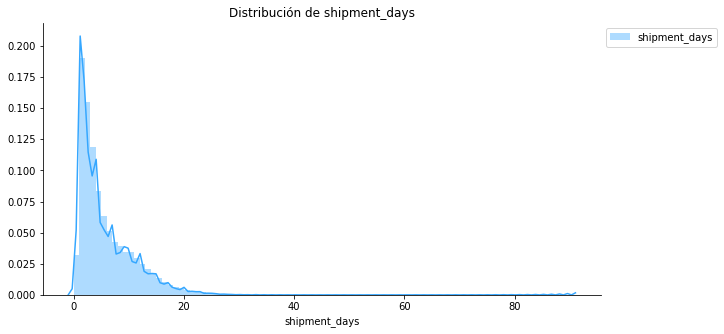

In [19]:
plt.figure(figsize=(10,5))
sb.distplot(dataset.shipment_days, bins=90, color=BLUE, label='shipment_days')
plt.title('Distribución de shipment_days')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
sb.despine()

In [100]:
stats.poisson.fit(dataset['shipment_days']) 

AttributeError: 'poisson_gen' object has no attribute 'fit'

In [99]:
stats.kstest(dataset['shipment_days'].dropna(), 'expon', args=(dataset['shipment_days'].mean(),dataset['shipment_days'].std()))

KstestResult(statistic=0.6420266346250125, pvalue=0.0)

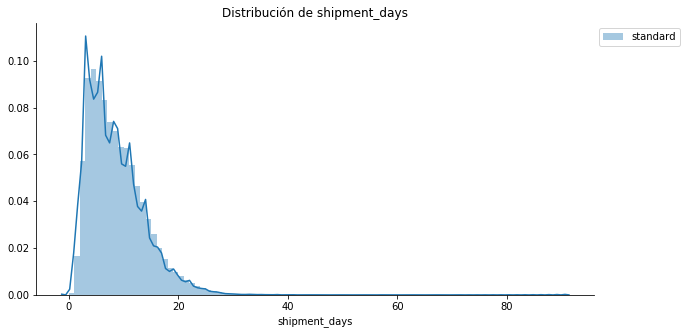

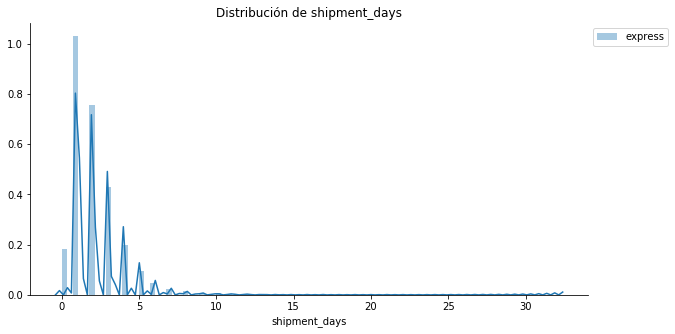

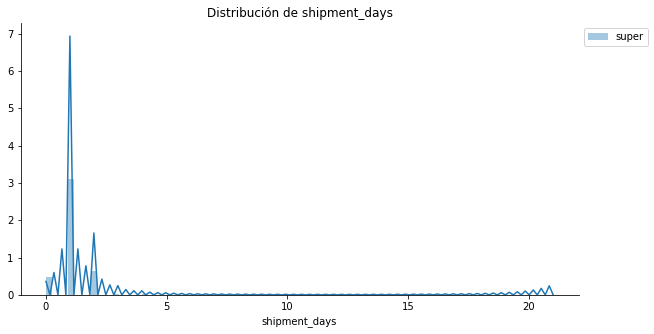

In [20]:

for types in dataset.shipment_type.unique():
    plt.figure(figsize=(10,5))
    sb.distplot(dataset[dataset.shipment_type==types].shipment_days, bins=90, label=types)
    #sb.distplot(latam['pf_identity'].dropna(), bins=10, color=RED, label='Latam')
    plt.title('Distribución de shipment_days')
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    sb.despine()

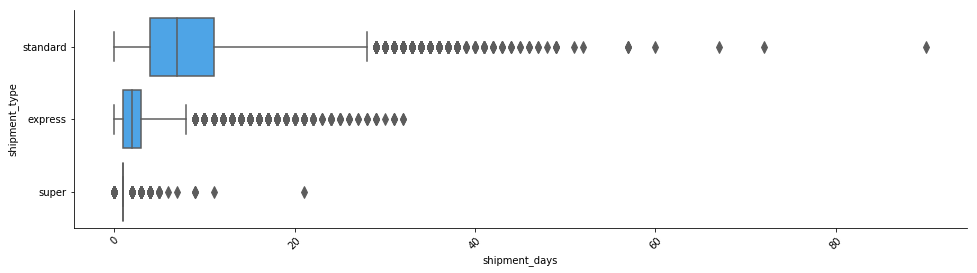

In [21]:
plt.figure(figsize=(16,4))
sb.boxplot(data=dataset,
           y='shipment_type', 
           x='shipment_days',
           color=BLUE,
          whis=2.5, fliersize=8)
plt.ylabel('shipment_type')
plt.xlabel('shipment_days')
plt.xticks(rotation=45)
#plt.ylim(0,4)
sb.despine()

4. ¿Cuál es la probabilidad de que el destinatario de un envío sea del estado de Minas Gerais (MG)? ¿Cuál es la probabilidad de que dicho envío (que llega a Minas Gerais) sea realizado mediante el servicio 1? 

5. ¿Cuál es la probabilidad de que un envío sea realizado con el método super express? ¿Y la de que un envío realizado con dicho método llegue al estado de Minas Gerais?

6. ¿Existe correlación entre el número de días que tarda un envío y el destinatario del mismo? ¿Y entre el número de días y la cantidad de productos en un paquete? ¿Con qué otra variable está correlacionado el número de días que tarda un envío? Analizar la independencia de las variables.

<Figure size 720x432 with 0 Axes>

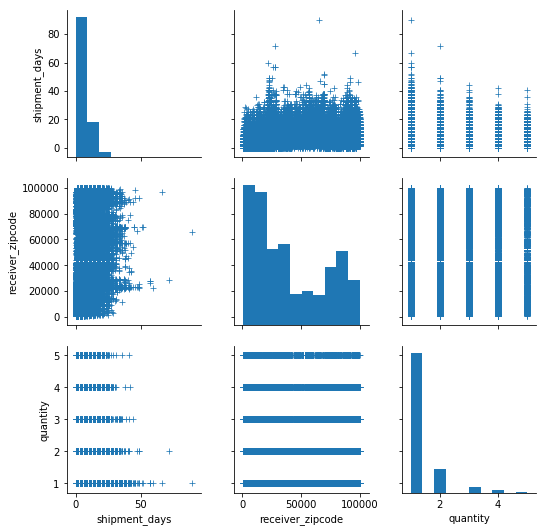

In [226]:
plt.figure(figsize=(10, 6))

sb.pairplot(
    data=dataset,
    vars=['shipment_days', 'receiver_zipcode', 'quantity'],
    markers='+')
plt.title('')
sb.despine()

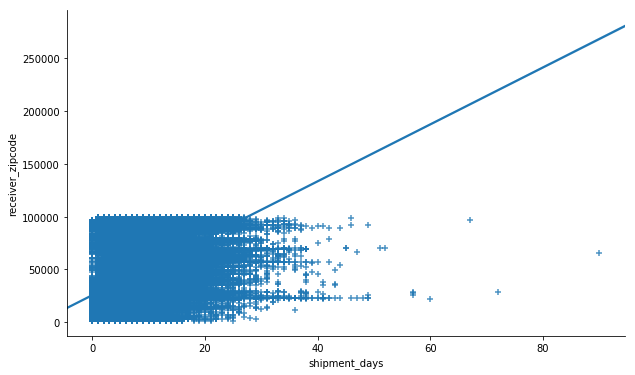

In [107]:
plt.figure(figsize=(10,6))
sb.regplot(data=dataset,
                x='shipment_days', y='receiver_zipcode',
                marker='+')
plt.title('')
sb.despine()

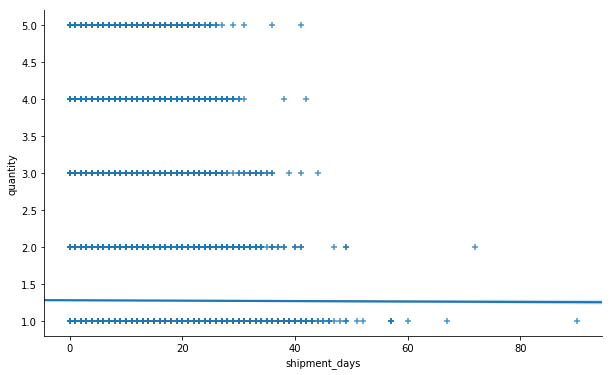

In [108]:
plt.figure(figsize=(10,6))
sb.regplot(data=dataset,
                x='shipment_days', y='quantity',
                marker='+')
plt.title('')
sb.despine()

Text(0.5, 1.0, '')

<Figure size 720x432 with 0 Axes>

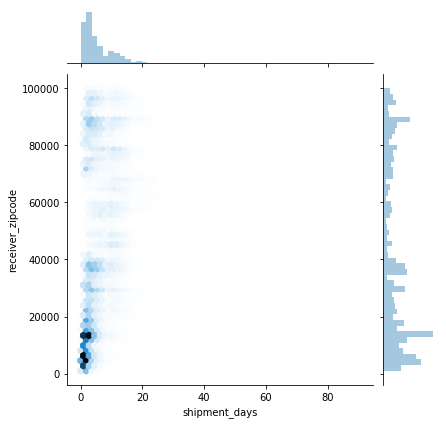

In [138]:
plt.figure(figsize=(10,6))
sb.jointplot(data=dataset,
                  x='shipment_days', y='receiver_zipcode', kind='hex')
plt.title('')

7. Además del cálculo de los estadísticos correspondientes, sería interesante observar un gráfico que muestre la información estadística (por ejemplo, la media) y la presencia de outliers del número de días que tardan los envíos que se realizan a los diferentes estados de Brasil. ¿Cuál es el estado que, en promedio, tiene una mayor demora?

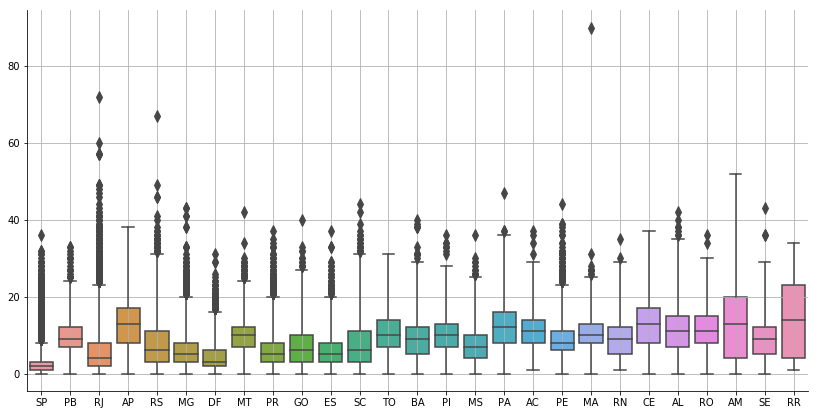

In [137]:
plt.figure(figsize=(14,7))
sb.boxplot(data=dataset,
                x='receiver_state', 
                y='shipment_days',
                whis=2.5, fliersize=8)
plt.xlabel('')
plt.grid(True)
plt.ylabel('')
sb.despine()

In [136]:
dataset.groupby('receiver_state')['shipment_days'].mean().reset_index().sort_values('shipment_days',ascending=False)

,receiver_state,shipment_days
21,RR,13.990888
5,CE,13.042073
2,AM,12.864381
3,AP,12.851145
13,PA,12.259911
1,AL,11.674263
20,RO,11.490625
0,AC,11.449761
26,TO,10.560398
9,MA,10.445693


8. ¿Cuál es la distancia geográfica de San Pablo a dicho estado? ¿Y al de menor?

In [217]:
dataset.sample()

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,shipment_days,resultado
474365,SP,13500,RS,95940,standard,1,2,done,2019-03-18,2019-03-21 02:36:55,2019-03-27 13:50:00,4.0,6.0


In [225]:
import urllib.request
import json

res = urllib.request.urlopen("http://api.postcodes.io/postcodes/SE18XX").read()
data = json.loads(res)
data#print(data["result"]["longitude"], data["result"]["latitude"])

{'status': 200,
 'result': {'postcode': 'SE1 8XX',
  'quality': 1,
  'eastings': 530795,
  'northings': 180218,
  'country': 'England',
  'nhs_ha': 'London',
  'longitude': -0.116825,
  'latitude': 51.505767,
  'european_electoral_region': 'London',
  'primary_care_trust': 'Lambeth',
  'region': 'London',
  'lsoa': 'Lambeth 036E',
  'msoa': 'Lambeth 036',
  'incode': '8XX',
  'outcode': 'SE1',
  'parliamentary_constituency': 'Vauxhall',
  'admin_district': 'Lambeth',
  'parish': 'Lambeth, unparished area',
  'admin_county': None,
  'admin_ward': "Bishop's",
  'ced': None,
  'ccg': 'NHS Lambeth',
  'nuts': 'Lambeth',
  'codes': {'admin_district': 'E09000022',
   'admin_county': 'E99999999',
   'admin_ward': 'E05000416',
   'parish': 'E43000212',
   'parliamentary_constituency': 'E14001008',
   'ccg': 'E38000092',
   'ced': 'E99999999',
   'nuts': 'UKI45'}}}

In [224]:
res = urllib.request.urlopen("https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=SE1%208XX&destinations=B2%205NY").read()
data = json.loads(res.decode())
data#print(data["rows"][0]["elements"][0]["distance"])

{'destination_addresses': [],
 'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account',
 'origin_addresses': [],
 'rows': [],
 'status': 'REQUEST_DENIED'}

9. ¿Cuál es la distribución de la entrega de envíos por hora del día para cada uno de los estados de Brasil? Realizar un único gráfico donde se muestre esta información.

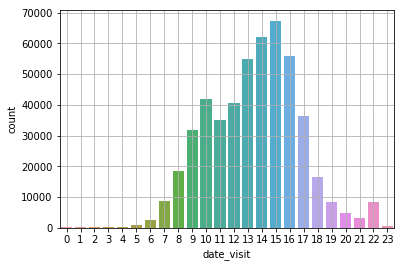

In [173]:
sb.countplot(pd.to_datetime(dataset['date_visit']).dt.hour)
plt.grid(True)

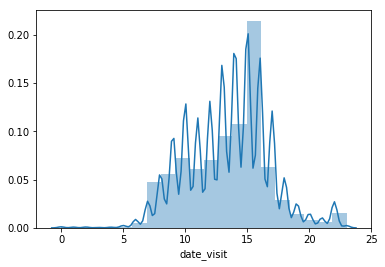

In [214]:
sb.distplot(pd.to_datetime(dataset['date_visit']).dt.hour, bins=20)

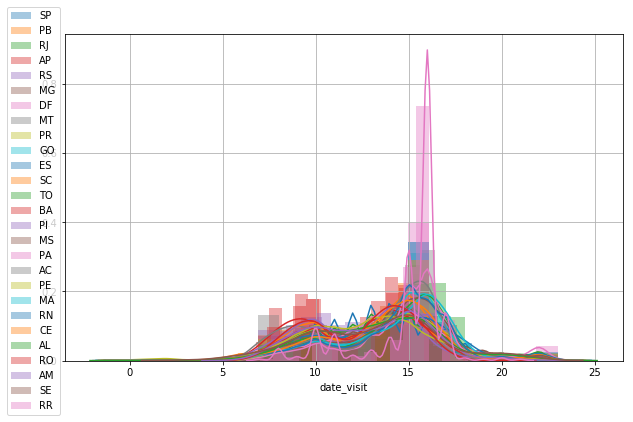

In [208]:

plt.figure(figsize=(10,6))

for state in dataset.receiver_state.unique():
    sb.distplot(pd.to_datetime(dataset[dataset.receiver_state==state]['date_visit']).dt.hour, bins=20)
plt.grid(True)
plt.legend(dataset.receiver_state.unique(),loc='best',bbox_to_anchor=(-0.5, 0.6, 0.5, 0.5))

10. Bonus (no obligatorio): Proponer y discutir la aplicación de al menos uno de los contenidos desarrollados en la clase de “Inferencia Bayesiana” al conjunto de datos y problemática aquí presentada. 

In [281]:
import time

start_time = time.time()

### Loop through all receiver states in dataset
### show pairplot
result=[]
for state in dataset.receiver_state.unique():
    result.append(dataset[dataset.receiver_state==state]['date_visit'].max())
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.8039212226867676 seconds ---


In [282]:
result

[Timestamp('2019-04-01 19:16:00'),
 Timestamp('2019-04-01 17:37:00'),
 Timestamp('2019-04-02 13:04:00'),
 Timestamp('2019-04-01 16:34:00'),
 Timestamp('2019-04-02 15:35:00'),
 Timestamp('2019-04-01 18:22:00'),
 Timestamp('2019-04-01 16:35:00'),
 Timestamp('2019-04-01 17:12:00'),
 Timestamp('2019-04-01 16:30:00'),
 Timestamp('2019-04-01 18:49:00'),
 Timestamp('2019-04-01 18:41:00'),
 Timestamp('2019-04-02 11:53:00'),
 Timestamp('2019-04-01 16:50:00'),
 Timestamp('2019-04-01 19:57:00'),
 Timestamp('2019-04-01 14:49:00'),
 Timestamp('2019-04-01 18:35:00'),
 Timestamp('2019-04-01 17:53:00'),
 Timestamp('2019-04-01 17:18:00'),
 Timestamp('2019-04-02 12:46:00'),
 Timestamp('2019-04-01 18:01:00'),
 Timestamp('2019-04-02 11:42:00'),
 Timestamp('2019-04-01 19:47:00'),
 Timestamp('2019-04-02 12:06:00'),
 Timestamp('2019-04-01 20:13:00'),
 Timestamp('2019-04-01 15:53:00'),
 Timestamp('2019-04-01 15:51:00'),
 Timestamp('2019-04-01 16:25:00')]

In [291]:
import concurrent.futures
import time

def calculate_hours(state):
    result.append(data[data.receiver_state==state]['date_visit'].max())
  

### Create a pool of processes. By default, one is created for each CPU in your machine.
start_time = time.time()

data=dataset
result=[]
with concurrent.futures.ProcessPoolExecutor() as executor:
    ### Get a list of files to process
    data_list = dataset['receiver_state'].unique()
    ### Process the list of files, but split the work across the process pool to use all CPUs
    ### Loop through all jpg files in the current folder 
    ### Resize each one to size 600x600
    executor.map(calculate_hours, data_list)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5691847801208496 seconds ---


In [292]:
result

[]

In [298]:
dataset.sample(3)

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,shipment_days,resultado
251097,SP,11660,RJ,25581,standard,3,1,done,2019-03-03,2019-03-06 14:59:00,2019-03-26 08:28:00,13.0,15.0
289828,SP,2522,RJ,22420,standard,1,1,done,2019-02-25,2019-02-28 16:04:00,2019-03-07 18:30:00,2.0,4.0
324180,SP,13076,MG,38525,standard,1,2,done,2019-03-17,2019-03-19 17:07:52,2019-03-28 18:04:00,7.0,9.0


In [ ]:
usuario|checkout/vip|clave|valor